In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_explain import polishing_solution_1

In this workspace, you'll perform some polishing and cleanup of a plot created using the Pokémon creature dataset.

In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task**: Perform polishing and cleaning steps for the following multivariate plot, where the relationship between height and weight are depicted for the Fairy and Dragon Pokémon types. You'll need to do more than just add meaningful labels and titles to the plot. Pay attention to the interpretability of tick marks and the ability to associate each point to a type of Pokemon.

For reference, height is in terms of meters and weight is in terms of kilograms. One other thing you might try is to change the colors mapped to each type to match those given by the game series. Fairy is depicted with a light pink (hex code #ee99ac) while Dragon is associated with a medium purple (hex code #7038f8). (Type colors taken from [Pokémon Wiki Bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates).)

In [3]:
# data processing: isolate only fairy and dragon type Pokemon
type_cols = ['type_1','type_2']

In [4]:
non_type_cols = pokemon.columns.difference(type_cols)

In [5]:
non_type_cols

Index(['attack', 'base_experience', 'defense', 'generation_id', 'height', 'hp',
       'id', 'special-attack', 'special-defense', 'species', 'speed',
       'weight'],
      dtype='object')

In [6]:
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()

In [7]:
pkmn_types

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607,95,270,115,7,1.0,80,801,130,115,magearna,65,80.5,type_2,fairy
1608,125,270,80,7,0.7,90,802,90,90,marshadow,125,22.2,type_2,ghost
1610,73,243,73,7,3.6,73,804,127,73,naganadel,121,150.0,type_2,dragon
1611,131,257,211,7,5.5,61,805,53,101,stakataka,13,820.0,type_2,steel


In [8]:
pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]

In [9]:
pokemon_sub

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
34,45,113,48,1,0.6,70,35,60,65,clefairy,35,7.5,type_1,fairy
35,70,217,73,1,1.3,95,36,95,90,clefable,60,40.0,type_1,fairy
146,64,60,45,1,1.8,41,147,50,50,dratini,50,3.3,type_1,dragon
147,84,147,65,1,4.0,61,148,70,70,dragonair,70,16.5,type_1,dragon
148,134,270,95,1,2.2,91,149,100,100,dragonite,80,210.0,type_1,dragon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,130,257,115,7,1.9,70,787,85,95,tapu-bulu,75,45.5,type_2,fairy
1594,75,257,115,7,1.3,70,788,95,130,tapu-fini,85,21.2,type_2,fairy
1605,101,257,53,7,5.5,223,799,97,53,guzzlord,43,888.0,type_2,dragon
1607,95,270,115,7,1.0,80,801,130,115,magearna,65,80.5,type_2,fairy


C:\Users\christopher.hu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


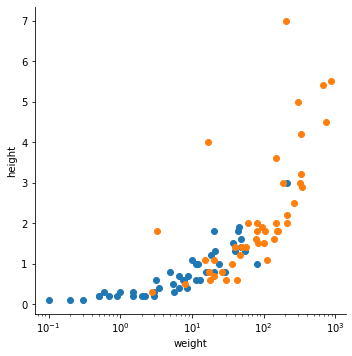

In [15]:
#plotting
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', size = 5)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log')  #need to set scaling before customizing ticks

C:\Users\christopher.hu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


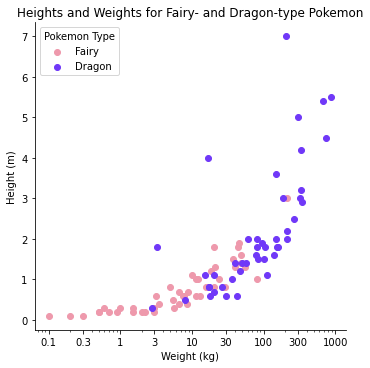

In [16]:
# MODIFY THIS CODE
# set up a dictionary to map types to colors
type_colors = {'fairy': '#ee99ac', 'dragon': '#7038f8'}
#plotting
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', size = 5, palette = type_colors)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log')  #need to set scaling before customizing ticks
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)
# add labels and titles
g.set_xlabels('Weight (kg)')
g.set_ylabels('Height (m)')
plt.title('Heights and Weights for Fairy- and Dragon-type Pokemon')
plt.legend(['Fairy', 'Dragon'], title = 'Pokemon Type')

I created labels to the individual axes, including units of measurement. I also added a descriptive title for the plot. On the x-axis, I've changed the default tick marks to be plain numbers, using a 1-3-10 scheme. Finally, I've added a legend to the plot to associate each point to a Pokemon type. To set up the custom colors, I added a 'palette' argument to the FacetGrid call, pointing to a dictionary associating each type to a color. The legend was added using matplotlib, so that the Pokemon types could be capitalized.


C:\Users\christopher.hu\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


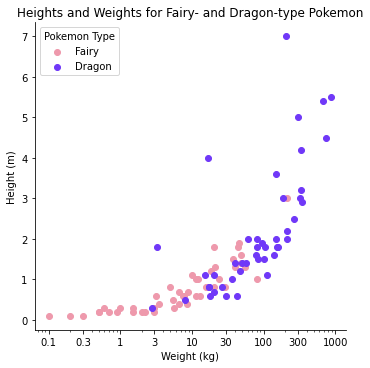

In [11]:
# run this cell to check your work against ours
polishing_solution_1()